In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pd.options.display.max_columns = 30

In [3]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
train.shape

(300000, 25)

In [5]:
test.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,300000,0,0,1,T,Y,Blue,Triangle,Axolotl,Finland,Piano,0870b0a5d,9ceb19dd6,530f8ecc3,9d117320c,3c49b42b8,2,Novice,Warm,j,P,be,5,11
1,300001,0,0,0,T,N,Red,Square,Lion,Canada,Piano,a5c276589,1ad744242,12e6161c9,46ae3059c,285771075,1,Master,Lava Hot,l,A,RP,7,5
2,300002,1,0,1,F,Y,Blue,Square,Dog,China,Piano,568550f04,1fe17a1fd,27d6df03f,b759e21f0,6f323c53f,2,Expert,Freezing,a,G,tP,1,12
3,300003,0,0,1,T,Y,Red,Star,Cat,China,Piano,c5725677e,a6542cec0,30c63bd0c,0b6ec68ff,b5de3dcc4,1,Contributor,Lava Hot,b,Q,ke,2,3
4,300004,0,1,1,F,N,Red,Trapezoid,Dog,China,Piano,e70a6270d,97b6a3518,a42386065,f91f3b1ee,967cfa9c9,3,Grandmaster,Lava Hot,l,W,qK,4,11


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
id        300000 non-null int64
bin_0     300000 non-null int64
bin_1     300000 non-null int64
bin_2     300000 non-null int64
bin_3     300000 non-null object
bin_4     300000 non-null object
nom_0     300000 non-null object
nom_1     300000 non-null object
nom_2     300000 non-null object
nom_3     300000 non-null object
nom_4     300000 non-null object
nom_5     300000 non-null object
nom_6     300000 non-null object
nom_7     300000 non-null object
nom_8     300000 non-null object
nom_9     300000 non-null object
ord_0     300000 non-null int64
ord_1     300000 non-null object
ord_2     300000 non-null object
ord_3     300000 non-null object
ord_4     300000 non-null object
ord_5     300000 non-null object
day       300000 non-null int64
month     300000 non-null int64
target    300000 non-null int64
dtypes: int64(8), object(17)
memory usage: 57.2+ MB


In [7]:
test.shape

(200000, 24)

In [8]:
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [9]:
binary = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']
ordinal = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']
nominal = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']

# Data Visualisation

In [10]:
target_counts = train['target'].value_counts()
print(target_counts)

0    208236
1     91764
Name: target, dtype: int64


In [11]:
def countplot(df, columns):
    fig, axs = plt.subplots(2, 5, figsize=(20, 8))

    for i in range(0, len(columns)):
        col = binary[i]
        ax = axs[0, i]
        sns.countplot(df[col], hue=df['target'], ax=ax)
        ax.set_title(col, fontsize=14, fontweight='bold')
        ax.legend(title="target", loc='upper center')
    
        ax = axs[1, i]
        sns.barplot(x=col, y='target', data=df, ax=ax)


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


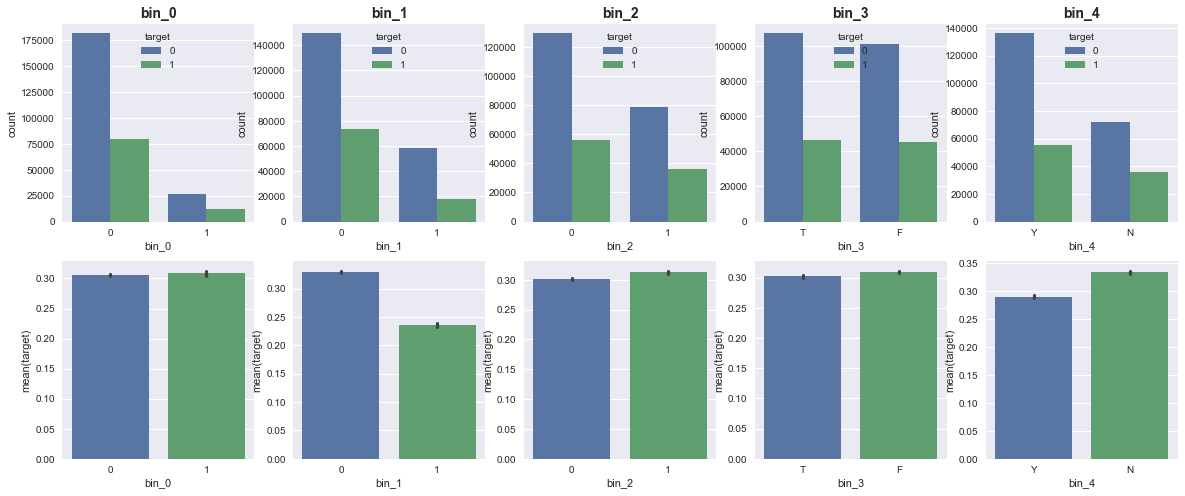

In [12]:
countplot(train, binary)

In [13]:
def categorical_count(df, columns, datatype):
    for i in range(0, len(columns)):
        col = columns[i]
        print(col, df[col].nunique())


In [14]:
# Nominal count
categorical_count(train, nominal, 'nom')

nom_0 3
nom_1 6
nom_2 6
nom_3 6
nom_4 4
nom_5 222
nom_6 522
nom_7 1220
nom_8 2215
nom_9 11981


In [15]:
# Ordinal count
categorical_count(train, ordinal, 'ord')

ord_0 3
ord_1 5
ord_2 6
ord_3 15
ord_4 26
ord_5 192


In [16]:
def barplot(df, columns):
    fig, axs = plt.subplots(1, 5, figsize=(20, 4))

    for i in range(0, len(columns)):
        col = columns[i]
        ax = axs[i]
#         sns.countplot(df[col], hue=df['target'], ax=ax)
        sns.barplot(x=col, y='target', data=df, ax=ax)
        ax.set_title(col, fontsize=14, fontweight='bold')
        ax.legend(title="target", loc='upper center')

C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


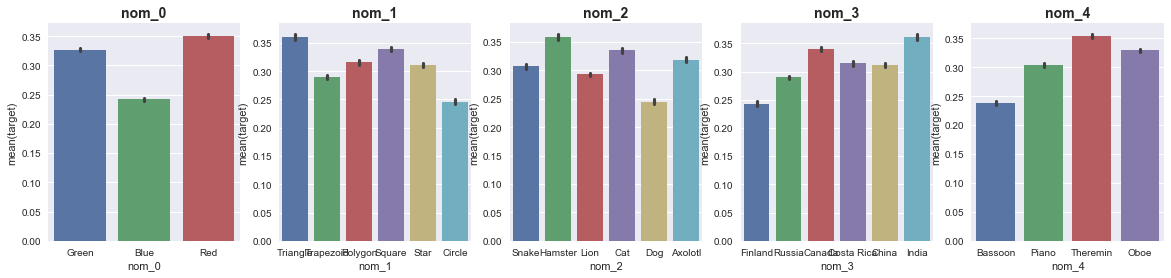

In [17]:
barplot(train, nominal[0:5])

# Preprocessing

In [18]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [19]:
def __encode_categorical(df_list, cat_cols):
    d = defaultdict(LabelEncoder)
    codes = pd.concat(
        [df[cat_cols] for df in df_list],
        axis=0
    ).fillna('').apply(
        lambda x: d[x.name].fit(x)
    ),
    for df in df_list:
        df[cat_cols] = df[cat_cols].fillna('').apply(
            lambda x: d[x.name].transform(x))


In [33]:
__encode_categorical(df_list=[train, test], cat_cols=nominal)
__encode_categorical(df_list=[train, test], cat_cols=ordinal)
__encode_categorical(df_list=[train, test], cat_cols=binary)

In [37]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,1,5,5,3,0,78,120,491,1689,2192,1,2,1,7,3,136,2,2,0
1,1,0,1,0,1,1,1,4,3,5,2,159,510,260,652,11719,0,2,3,0,0,93,7,8,0
2,2,0,0,0,0,1,0,4,4,5,3,44,14,766,1935,8140,0,1,4,7,17,31,7,2,0
3,3,0,1,0,0,1,2,4,5,0,1,209,165,1121,631,6098,0,2,0,8,3,134,2,1,1
4,4,0,0,0,0,0,2,4,4,0,1,90,61,34,1763,8293,0,2,2,0,17,158,7,8,0


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import roc_auc_score

In [39]:
train.shape[0]/(train.shape[0]+test.shape[0])

0.6

In [41]:
X = train.drop('target', axis=1)
y = train['target']

In [42]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=42)


In [82]:
forrest = RandomForestClassifier( n_estimators=150, random_state=42)

In [83]:
forrest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [84]:
prediction = forrest.predict_proba(X=X_dev)

In [85]:
roc_auc_score(y_true=y_dev, y_score=prediction[:,1])

0.7432808606093257

In [94]:
submition = pd.read_csv('sample_submission.csv')

In [95]:
submition.head()

,id,target
0,300000,0.5
1,300001,0.5
2,300002,0.5
3,300003,0.5
4,300004,0.5


In [90]:
forrest = RandomForestClassifier( n_estimators=150, random_state=42)
forrest.fit(train.drop('target', axis=1), train['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [92]:
predict = forrest.predict_proba(test)

In [102]:
submition['target'] = predict[:,1]

In [103]:
submition.head()

,id,target
0,300000,0.420000
1,300001,0.473333
2,300002,0.440000
3,300003,0.413333
4,300004,0.666667


In [104]:
submition.to_csv('submition_1.csv',index=False)

# Holdout : 0.7432808606093257
# Leader board: 0.73790